# Introducción a los bosques aleatorios

### Importar librerias

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

## Tu primer random forest con scikit-learn

### Diabetes

In [2]:
df = pd.read_csv('../data/pima-indians-diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Análisis de datos para tu primer random forest

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Renombramos las columnas
df.columns = ['number of times pregnant', 'plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'diastolic blood pressure (mm Hg)', 'triceps skin fold thickness (mm)', '2-hour serum insulin (mu U/ml)', 'body mass index (weight in kg/(height in m)^2)', 'diabetes pedigree function', 'age (years)', 'class variable (0 or 1)']

#Verificacion de datos
df.head()

,number of times pregnant,plasma glucose concentration a 2 hours in an oral glucose tolerance test,diastolic blood pressure (mm Hg),triceps skin fold thickness (mm),2-hour serum insulin (mu U/ml),body mass index (weight in kg/(height in m)^2),diabetes pedigree function,age (years),class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Entrenamiento de tu primer modelo de random forest con scikit-learn

In [6]:
# Separamos en X y Y
df_1 = df.copy()
X = df_1.drop(['class variable (0 or 1)'], axis=1)
y = df_1['class variable (0 or 1)']

In [7]:
# 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
# Creación del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

In [11]:
# Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
# Calculo de las predicciones
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación de tu primer modelo de random forest con scikit-learn

In [13]:
# Accuracy en el train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.9888268156424581

In [14]:
# Accuracy en el test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.7402597402597403

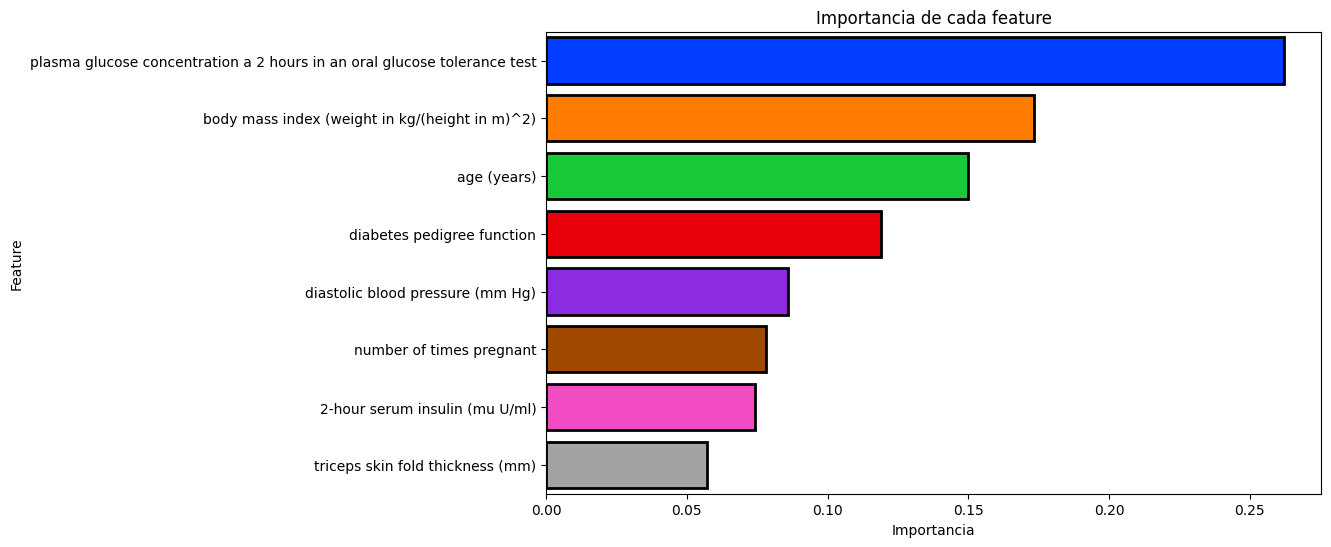

In [15]:
# Verificando el feature importance
importances = random_forest.feature_importances_
columns = X.columns

# Crear un DataFrame con los datos
importance_df = pd.DataFrame({'Column': columns, 'Importance': importances})

# Ordenar por importancia de manera descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Column', data=importance_df, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)

# Título y etiquetas
plt.title('Importancia de cada feature')
plt.xlabel('Importancia')
plt.ylabel('Feature')

# Mostrar el gráfico
plt.show()

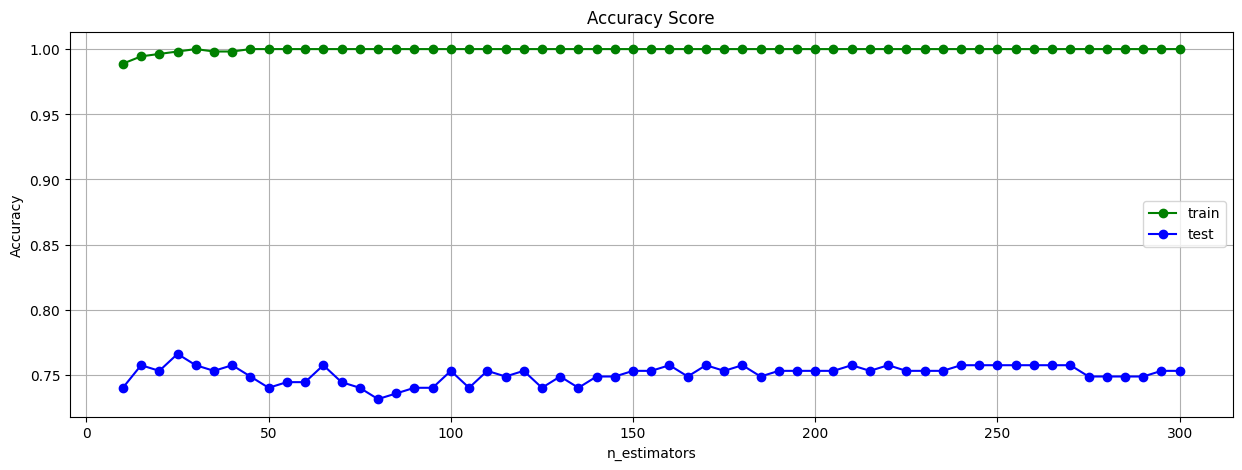

In [22]:
n_estimators = list()
accuracy_score_train = list()
accuracy_score_test = list()

for n in range(10, 301, 5):
   n_estimators.append(n)
   rf = RandomForestClassifier(n_estimators=n, random_state = 42)
   rf.fit(X_train, y_train)
   
   y_train_pred = rf.predict(X_train)
   y_test_pred = rf.predict(X_test)
   
   accuracy_score_train.append(accuracy_score(y_train, y_train_pred))
   accuracy_score_test.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(15, 5))
plt.plot(n_estimators, accuracy_score_train, 'g', marker='o', label='train')
plt.plot(n_estimators, accuracy_score_test, 'b', marker='o', label='test')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Score')
plt.legend()
plt.grid()
plt.show()